Dear Client,

Thank you for providing us with the three datasets from Sprocket Central Pty Ltd. We 
highlighted the data quality issues below as well as the profits made from each brand based on the customer demographics and the transaction history. Please let us know if the figures are
not aligned with your understanding. 



*In the transactions part:*
- Product first sold date is not accurate, it is not shown as a date.
- There are duplicates in customer ids

*In Customer Demographics, the data is not tidy as well.* 
- There are **outdated** and **non-available** information for **DOB**. There is a person who was born in 1843 and some customers have missing birth records.  

- The **“deceased indicator”** is also not up to date since it does not show the person who was born in 1843 as deceased. 

- Furthermore, those with **missing birth records** also have **invalid information for gender**. It does not show whether they are males or females.

- **Default column** has missing, or non-usable values. That is why its necessary to disregard that column so it will not interfere with our analysis.

In [768]:
import pandas as pd

In [769]:
df= pd.read_excel("/Users/Kantemirovs/Desktop/customer_demographic.xlsx")

We eliminated the default column since the data in the column was not clear we did not want it to interfere with the analysis

In [770]:

df=df.drop('default',axis=1)


In [771]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3996,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3997,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3998,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


Transaction sheet provides data about the customers that actually executed orders. Thus, I wanted to merge both customer demographics dataframe and transactions dataframe as well as Customer Address dataframe on Customer ID to include the customers that ordered bikes, and filter out those who did not. 

In [772]:
transactions=pd.read_excel("/Users/Kantemirovs/Desktop/Transactions.xlsx")
address=pd.read_excel("/Users/Kantemirovs/Desktop/CustomerAddress.xlsx")

In [773]:
df_merged=pd.merge(df, transactions, left_on=['customer_id'],
              right_on=['customer_id'],
              how='inner')
df_merged=pd.merge(df_merged,address,left_on=['customer_id'],
              right_on=['customer_id'],
              how='inner')

There were duplicates for the customer_id column. Thus we eliminated them by dropping the rows that has the same client first and last name

In [774]:
df_merged.drop_duplicates(subset =["first_name","last_name","DOB"], 
                     keep = False, inplace = True) 

In [775]:
df_merged

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
1143,2807,Lynna,Revens,Female,9,1957-06-18,Senior Editor,Manufacturing,Mass Customer,N,...,medium,small,1216.14,1082.36,34527.0,441 Superior Junction,2320,NSW,Australia,6
1685,3279,Morgun,Razoux,Male,55,1959-02-18,Staff Scientist,Financial Services,Mass Customer,N,...,medium,large,1071.23,380.74,35160.0,07803 Dexter Pass,2170,NSW,Australia,9
2044,2145,Adrea,Quittonden,Female,44,1959-11-11,Librarian,Entertainment,Affluent Customer,N,...,high,medium,748.17,448.90,37698.0,9870 Brickson Park Trail,2216,NSW,Australia,8
2253,191,Christopher,Heining,Male,22,1960-04-27,Help Desk Operator,NaN,Affluent Customer,N,...,medium,medium,1065.03,230.09,37874.0,3 Buell Park,2261,NSW,Australia,7
3206,1544,Keane,Moneypenny,Male,75,1963-08-22,Dental Hygienist,Health,Affluent Customer,N,...,low,medium,1057.51,154.40,35560.0,16 Maple Wood Center,2155,NSW,Australia,10
3290,1248,Genia,Bartel,Female,31,1963-12-18,General Manager,NaN,Affluent Customer,N,...,high,small,1661.92,1479.11,35560.0,47 Glacier Hill Junction,4873,QLD,Australia,2
3810,2863,Alisander,Fetherstone,Male,90,1965-03-26,Internal Auditor,Manufacturing,Mass Customer,N,...,medium,medium,544.05,376.84,38647.0,69 Dexter Parkway,2460,NSW,Australia,3
3869,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,N,...,medium,medium,1163.89,589.27,42560.0,322 Garrison Way,3169,VIC,Australia,9
4136,2395,Ashlin,Kesby,Male,23,1966-02-26,Executive Secretary,NaN,High Net Worth,N,...,medium,medium,230.91,173.18,39031.0,7346 Luster Circle,4131,QLD,Australia,5
4139,1757,Hashim,Hartwell,Male,68,1966-03-03,NaN,IT,High Net Worth,N,...,medium,medium,1228.07,400.91,36668.0,73425 Mitchell Court,4304,QLD,Australia,3


As mentioned above I wanted to eliminate inaccurate data: In this case, it was the deceased column as well as the date of the first sale. Therefore we can have more accurate assumptions.

In [776]:
df_clean=df_merged.drop(['deceased_indicator','product_first_sold_date'],axis=1)
df_clean

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,...,product_line,product_class,product_size,list_price,standard_cost,address,postcode,state,country,property_valuation
1143,2807,Lynna,Revens,Female,9,1957-06-18,Senior Editor,Manufacturing,Mass Customer,Yes,...,Standard,medium,small,1216.14,1082.36,441 Superior Junction,2320,NSW,Australia,6
1685,3279,Morgun,Razoux,Male,55,1959-02-18,Staff Scientist,Financial Services,Mass Customer,No,...,Standard,medium,large,1071.23,380.74,07803 Dexter Pass,2170,NSW,Australia,9
2044,2145,Adrea,Quittonden,Female,44,1959-11-11,Librarian,Entertainment,Affluent Customer,Yes,...,Standard,high,medium,748.17,448.90,9870 Brickson Park Trail,2216,NSW,Australia,8
2253,191,Christopher,Heining,Male,22,1960-04-27,Help Desk Operator,NaN,Affluent Customer,Yes,...,Standard,medium,medium,1065.03,230.09,3 Buell Park,2261,NSW,Australia,7
3206,1544,Keane,Moneypenny,Male,75,1963-08-22,Dental Hygienist,Health,Affluent Customer,Yes,...,Standard,low,medium,1057.51,154.40,16 Maple Wood Center,2155,NSW,Australia,10
3290,1248,Genia,Bartel,Female,31,1963-12-18,General Manager,NaN,Affluent Customer,Yes,...,Standard,high,small,1661.92,1479.11,47 Glacier Hill Junction,4873,QLD,Australia,2
3810,2863,Alisander,Fetherstone,Male,90,1965-03-26,Internal Auditor,Manufacturing,Mass Customer,No,...,Road,medium,medium,544.05,376.84,69 Dexter Parkway,2460,NSW,Australia,3
3869,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,Yes,...,Standard,medium,medium,1163.89,589.27,322 Garrison Way,3169,VIC,Australia,9
4136,2395,Ashlin,Kesby,Male,23,1966-02-26,Executive Secretary,NaN,High Net Worth,No,...,Standard,medium,medium,230.91,173.18,7346 Luster Circle,4131,QLD,Australia,5
4139,1757,Hashim,Hartwell,Male,68,1966-03-03,NaN,IT,High Net Worth,No,...,Standard,medium,medium,1228.07,400.91,73425 Mitchell Court,4304,QLD,Australia,3


**To see our profit from sales, I deducted the standard cost from the list price**

In [777]:
df_clean['profit']=df_clean['list_price']-df_clean['standard_cost']

In [778]:
df_clean['DOB']=df_clean['DOB'].map(lambda x: 2020-x.year)

df_clean['owns_car'] = df_clean['owns_car'].map({'Yes': 1, 'No': 0})
df_clean=df_clean.rename(columns={'DOB':'age'})
df_clean=df_clean.replace(to_replace =["New South Wales"],  
                            value ="NSW") 

*After cleaning the data our dataframe is reduced to 49 rows and 28 columns*

In [779]:
df_clean.shape

(49, 28)

In [780]:
df_clean.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'transaction_id', 'product_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'profit'],
      dtype='object')

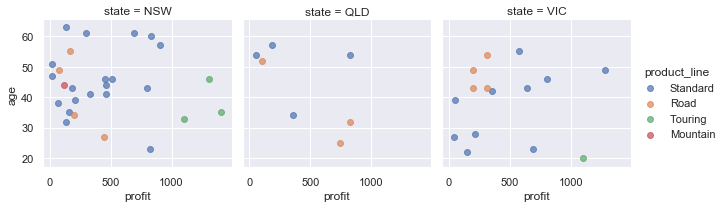

In [781]:
import seaborn as sns
from matplotlib import pyplot as plt

#Provides a better looking layout for the plots
sns.set()

#the plots will be interactive(zoom, cursor)
%matplotlib inline

g = sns.FacetGrid(df_clean, col="state", hue="product_line")
g.map(plt.scatter, "profit", "age", alpha=.7)
g.add_legend();


In [782]:
print('Correlation of profit with cars: {:.2f}'
     .format(df_clean['owns_car'].corr(df_clean['profit'])))
print('Correlation of profit with bike related purchases: {:.2f}'
     .format(df_clean['past_3_years_bike_related_purchases'].corr(df_clean['profit'])))
print('Correlation of profit with property valuation: {:.2f}'
     .format(df_clean['property_valuation'].corr(df_clean['profit'])))

Correlation of profit with cars: 0.14
Correlation of profit with bike related purchases: 0.20
Correlation of profit with property valuation: 0.17


In [786]:
print(df_clean.groupby(["product_line","state"])['profit'].sum().sort_values(ascending=False))

product_line  state
Standard      NSW      7470.38
              VIC      4798.47
Touring       NSW      3817.59
Road          QLD      1680.42
Standard      QLD      1424.20
Touring       VIC      1103.43
Road          VIC      1016.06
              NSW       887.00
Mountain      NSW       114.93
Name: profit, dtype: float64


In [787]:
df_clean.groupby('product_line').size()

product_line
Mountain     1
Road        11
Standard    33
Touring      4
dtype: int64

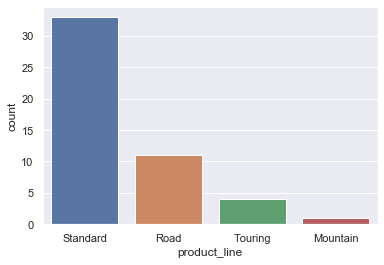

In [760]:

sns.countplot(df_clean['product_line'],label="Count")
plt.show()


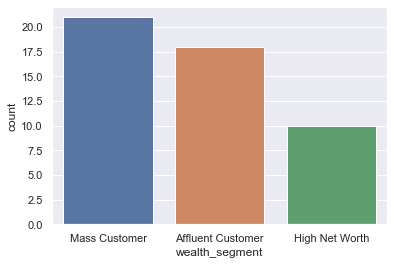

In [761]:
sns.countplot(df_clean['wealth_segment'],label="Count")
plt.show()

In [788]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

le=LabelEncoder()
scaler=MinMaxScaler()
df_clean['product_line']=le.fit_transform(df_clean['product_line'])
df_clean['state']=le.fit_transform(df_clean['state'])
features=['state','profit','product_line','owns_car','property_valuation']
X = df_clean[features]
y = df_clean['wealth_segment']

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1220)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [790]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.62


In [791]:
clf.predict(X_test)

array(['Mass Customer', 'Affluent Customer', 'Mass Customer',
       'Mass Customer', 'Affluent Customer', 'High Net Worth',
       'Mass Customer', 'Mass Customer', 'Mass Customer', 'Mass Customer',
       'Mass Customer', 'Mass Customer', 'Mass Customer'], dtype=object)